In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import sys

In [2]:
sys.path.insert(0, os.path.abspath('..'))
from milleniumcohort import create_config

In [3]:
config = create_config('../config.yml')
config.create_data_paths()

In [4]:
model_file_orig = '/media/sf_VBox_Shared/London/CLSdata500/results/mod_10st_0b_15r_720t_acceleration/model.pkl'
model_file_sub = '/media/sf_VBox_Shared/London/CLSdata250/results/mod_10st_0b_15r_720t_acceleration/model.pkl'

In [5]:
import pickle
with open(model_file_orig, 'r') as f:
    model_orig = pickle.load(file=f)
    
with open(model_file_sub, 'r') as f:
    model_sub = pickle.load(file=f)

In [6]:
params_orig = pd.DataFrame(
            [[o.params['mu'][0]*1000 for o in model_orig.obs_distns],
              [o.params['sigma'][0][0]*1000 for o in model_orig.obs_distns],
             [o.params['lmbda'] for o in model_orig.dur_distns]
            ]
                          ).transpose().reset_index()
params_orig.columns = ['state', 'mean', 'sigma', 'lmbda']

params_sub = pd.DataFrame([[o.params['mu'][0]*1000 for o in model_sub.obs_distns],
              [o.params['sigma'][0][0]*1000 for o in model_sub.obs_distns],
            [o.params['lmbda'] for o in model_sub.dur_distns]]).transpose().reset_index()
params_sub.columns = ['state', 'mean', 'sigma', 'lmbda']

In [7]:
params_orig = params_orig.sort_values('mean')
params_orig.index = range(len(params_orig))

In [8]:
params_sub = params_sub.sort_values('mean')
params_sub.index = range(len(params_sub))

In [9]:
params = pd.concat([params_orig, params_sub], axis=1, keys=['orig', 'sub'])
params

orig                                       sub                          \
  state        mean       sigma       lmbda state        mean       sigma   
0     5    0.016563    0.000247  118.712066     1    0.039983    0.000496   
1     6    5.224012    0.017303   28.711825     2    5.808443    0.022846   
2     8   18.955417    0.251233   61.785816     0   20.978779    0.252522   
3     9   35.370388    0.906046   23.354108     9   29.143078    0.585609   
4     0   46.900395    0.639371  144.161898     3   63.189587    1.526341   
5     7   78.407262    4.107857    2.805382     7   71.372049    3.268943   
6     4   87.347681    2.112939  165.343181     8   88.824289    2.485879   
7     3  100.141043    4.148632   53.318555     4  104.392948    4.548113   
8     2  172.369195    9.846896   57.472028     5  199.503537   13.513618   
9     1  483.348122  226.759184    3.891144     6  547.683055  273.429208   

               
        lmbda  
0  111.406793  
1   27.767786  
2  103.986623  
3   20.705249  
4  141.885096  
5    2.192069  
6   91.648088  
7   35.650313  
8   34.523140  
9    3.090514

In [10]:
params[('orig', 'log_mean')] = np.log10(params[('orig', 'mean')])
params[('sub', 'log_mean')] = np.log10(params[('sub', 'mean')])
params[('orig', 'log_sigma')] = np.log10(params[('orig', 'sigma')])
params[('sub', 'log_sigma')] = np.log10(params[('sub', 'sigma')])
params = params.sort_index(axis=1)
for c in ('mean', 'sigma', 'log_mean', 'log_sigma', 'lmbda'):
    params[('diff', c)] =  params[('orig', c)] - params[('sub', c)]
params

orig                                                           sub  \
        lmbda  log_mean log_sigma        mean       sigma state       lmbda   
0  118.712066 -1.780850 -3.607674    0.016563    0.000247     5  111.406793   
1   28.711825  0.718004 -1.761872    5.224012    0.017303     6   27.767786   
2   61.785816  1.277733 -0.599924   18.955417    0.251233     8  103.986623   
3   23.354108  1.548640 -0.042850   35.370388    0.906046     9   20.705249   
4  144.161898  1.671177 -0.194247   46.900395    0.639371     0  141.885096   
5    2.805382  1.894356  0.613615   78.407262    4.107857     7    2.192069   
6  165.343181  1.941251  0.324887   87.347681    2.112939     4   91.648088   
7   53.318555  2.000612  0.617905  100.141043    4.148632     3   35.650313   
8   57.472028  2.236460  0.993299  172.369195    9.846896     2   34.523140   
9    3.891144  2.684260  2.355565  483.348122  226.759184     1    3.090514   

                                                          diff             \
   log_mean log_sigma        mean       sigma state       mean      sigma   
0 -1.398123 -3.304822    0.039983    0.000496     1  -0.023420  -0.000249   
1  0.764060 -1.641187    5.808443    0.022846     2  -0.584431  -0.005543   
2  1.321780 -0.597701   20.978779    0.252522     0  -2.023362  -0.001289   
3  1.464535 -0.232392   29.143078    0.585609     9   6.227310   0.320437   
4  1.800646  0.183652   63.189587    1.526341     3 -16.289192  -0.886970   
5  1.853528  0.514407   71.372049    3.268943     7   7.035213   0.838914   
6  1.948532  0.395480   88.824289    2.485879     8  -1.476608  -0.372941   
7  2.018671  0.657831  104.392948    4.548113     4  -4.251906  -0.399481   
8  2.299951  1.130772  199.503537   13.513618     5 -27.134341  -3.666721   
9  2.738529  2.436845  547.683055  273.429208     6 -64.334934 -46.670024   

                                  
   log_mean log_sigma      lmbda  
0 -0.382727 -0.302852   7.305273  
1 -0.046056 -0.120684   0.944038  
2 -0.044047 -0.002223 -42.200807  
3  0.084104  0.189542   2.648858  
4 -0.129469 -0.377899   2.276801  
5  0.040828  0.099208   0.613313  
6 -0.007280 -0.070593  73.695093  
7 -0.018059 -0.039926  17.668243  
8 -0.063491 -0.137472  22.948888  
9 -0.054269 -0.081280   0.800631

In [11]:
o = model_orig.obs_distns[0]
o.natural_hypparam

array([[ 1. ,  0. ,  0. ],
       [ 0. ,  0.3,  0. ],
       [ 0. ,  0. ,  9. ]])

In [12]:
model_sub.obs_distns[0].natural_hypparam

array([[ 1. ,  0. ,  0. ],
       [ 0. ,  0.3,  0. ],
       [ 0. ,  0. ,  9. ]])

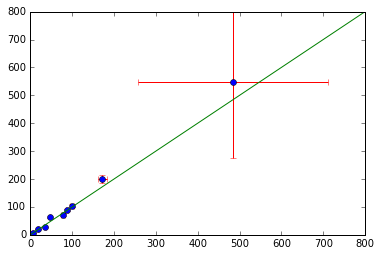

In [13]:
maxval = 800
plt.figure()
plt.errorbar(x=params[('orig','mean')], y=params[('sub', 'mean')],
             xerr=params[('orig','sigma')], yerr=params[('sub', 'sigma')], 
             fmt='o', ecolor='r')
plt.plot(range(maxval), range(maxval))
plt.xlim(0, maxval)
plt.ylim(0, maxval)
plt.show()

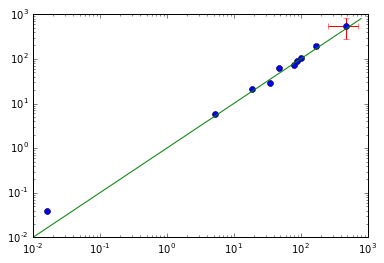

In [14]:
maxval = 800
fig = plt.figure()
ax = fig.add_subplot(111)
ax.errorbar(x=params[('orig','mean')], y=params[('sub', 'mean')],
             xerr=params[('orig','sigma')], yerr=params[('sub', 'sigma')], 
             fmt='o', ecolor='r')
ax.plot(range(maxval), range(maxval))
#ax.xlim(0, maxval)
#ax.ylim(0, maxval)
ax.set_xscale("log")
ax.set_yscale("log")
plt.show()

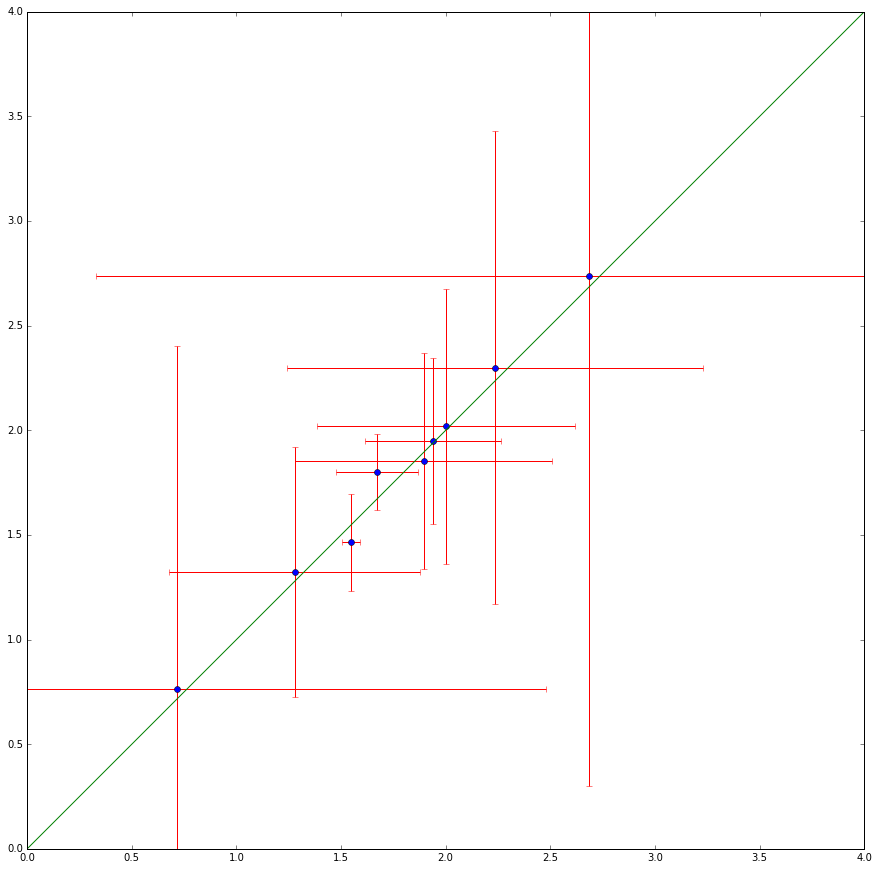

In [15]:
minval = -4
maxval = 4
plt.figure(figsize=(15,15))
plt.errorbar(x=params[('orig','log_mean')], y=params[('sub', 'log_mean')],
             xerr=params[('orig','log_sigma')], yerr=params[('sub', 'log_sigma')], 
             fmt='o', ecolor='r')
plt.plot(range(minval, maxval+1), range(minval, maxval+1))
plt.xlim(0, maxval)
plt.ylim(0, maxval)
plt.show()

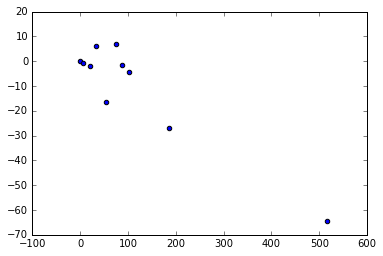

In [16]:
diff = params_orig['mean'] - params_sub['mean']
avg = 0.5 * (params_orig['mean'] + params_sub['mean'])
plt.scatter(avg, diff)

In [17]:
n_orig = 500
n_sub = 1 # 250
SE = params_orig['sigma'] / np.sqrt(n_sub)
z = (params_sub['mean'] - params_orig['mean']) / SE
z

0    94.897847
1    33.775745
2     8.053741
3    -6.873060
4    25.476891
5    -1.712624
6     0.698841
7     1.024894
8     2.755624
9     0.283715
dtype: float64

/home/dafne/anaconda2/envs/ucl2/lib/python2.7/site-packages/matplotlib-1.5.3-py2.7-linux-x86_64.egg/matplotlib/cbook.py:2644: UserWarning: Saw kwargs [u'mew', u'markeredgewidth'] which are all aliases for u'markeredgewidth'.  Kept value from u'markeredgewidth'
  seen=seen, canon=canonical, used=seen[-1]))


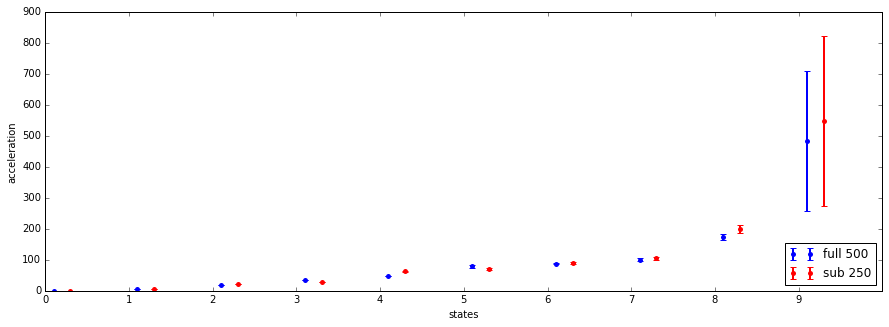

In [18]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
positions = list(range(len(params_sub)))
positions_0 = [p+0.1 for p in positions]
positions_1 = [p+0.3 for p in positions]
ax.errorbar(x=positions_0, y=params[('orig', 'mean')],
             yerr=params[('orig', 'sigma')],
             fmt='o', ecolor='b', color='b', elinewidth=2,  ms=5,capthick=1, mew=0, label='full 500')
ax.errorbar(x=positions_1, y=params[('sub', 'mean')],
             yerr=params[('sub', 'sigma')],
             fmt='o', ecolor='r', color='r', ms=5,capthick=1, mew=0, elinewidth=2, label='sub 250')
ax.set_xticks(positions)
ax.legend(loc=4)
ax.set_xlabel('states')
ax.set_ylabel('acceleration')
#ax.set_ylim(0, 200)
plt.show()

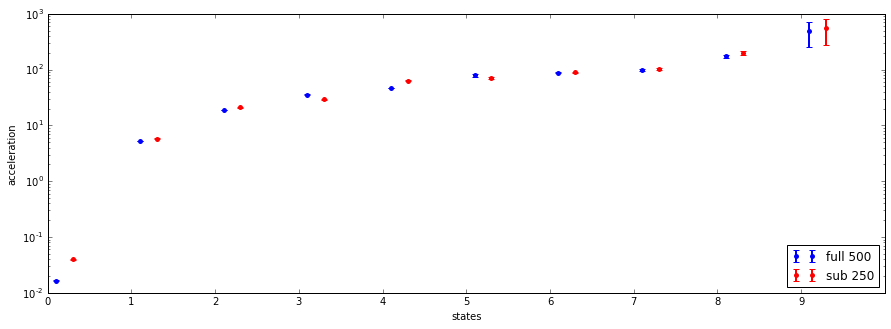

In [19]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
positions = list(range(len(params_sub)))
positions_0 = [p+0.1 for p in positions]
positions_1 = [p+0.3 for p in positions]
ax.errorbar(x=positions_0, y=params[('orig', 'mean')],
             yerr=params[('orig', 'sigma')],
             fmt='o', ecolor='b', color='b', elinewidth=2,  ms=5,capthick=1, mew=0, label='full 500')
ax.errorbar(x=positions_1, y=params[('sub', 'mean')],
             yerr=params[('sub', 'sigma')],
             fmt='o', ecolor='r', color='r', ms=5,capthick=1, mew=0, elinewidth=2, label='sub 250')
ax.set_xticks(positions)
ax.legend(loc=4)
ax.set_yscale("log")
ax.set_xlabel('states')
ax.set_ylabel('acceleration')
#ax.set_ylim(5, 900)
plt.show()

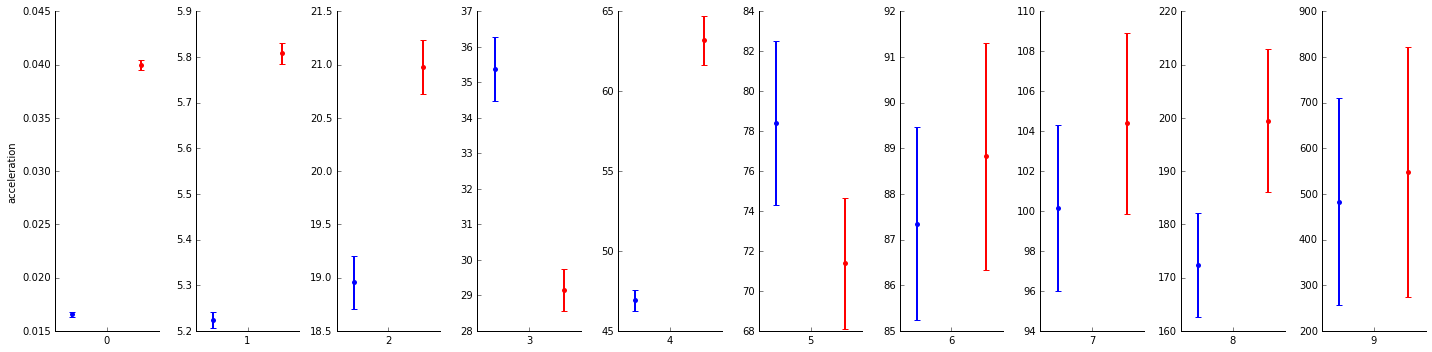

In [20]:
fig = plt.figure(figsize=(20,5))
positions = list(range(len(params_sub)))
for i in positions:
    ax = fig.add_subplot(1,len(positions),i+1)
    position_0 = i-0.2
    position_1 = i+0.2
    ax.errorbar(x=[position_0], 
                y=params[('orig', 'mean')][i:i+1],
                 yerr=params[('orig', 'sigma')][i:i+1],
                 fmt='o', ecolor='b', color='b', elinewidth=2,  ms=5,capthick=1, mew=0, label='full 500')
    ax.errorbar(x=[position_1], 
                y=params[('sub', 'mean')][i:i+1],
                 yerr=params[('sub', 'sigma')][i:i+1],
             fmt='o', ecolor='r', color='r', ms=5,capthick=1, mew=0, elinewidth=2, label='sub 250')
    ax.set_xticks([i])
    #ax.legend(loc=4)
    #ax.set_yscale("log")
    ax.set_xlim(i-0.3, i+0.3)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.spines['left'].set_visible(False)
    #ax.spines['bottom'].set_visible(False)
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    #ax.set_xlabel('states')
    if i==0:
        ax.set_ylabel('acceleration')
    
fig.tight_layout()
plt.show()

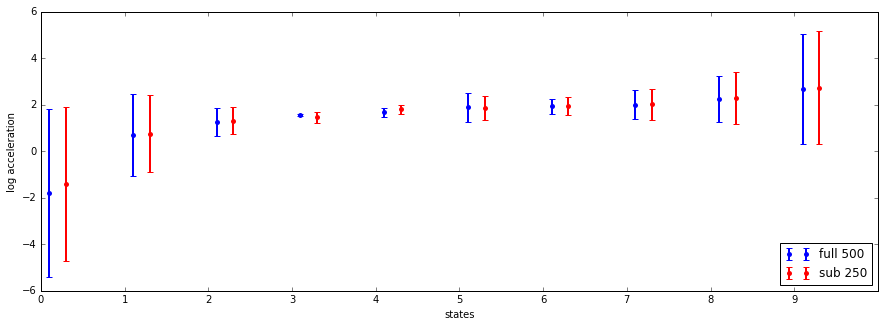

In [21]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
positions = list(range(len(params_sub)))
positions_0 = [p+0.1 for p in positions]
positions_1 = [p+0.3 for p in positions]
ax.errorbar(x=positions_0, y=params[('orig', 'log_mean')],
             yerr=params[('orig', 'log_sigma')],
             fmt='o', ecolor='b', color='b', elinewidth=2,  ms=5,capthick=1, mew=0, label='full 500')
ax.errorbar(x=positions_1, y=params[('sub', 'log_mean')],
             yerr=params[('sub', 'log_sigma')],
             fmt='o', ecolor='r', color='r', ms=5,capthick=1, mew=0, elinewidth=2, label='sub 250')
ax.set_xticks(positions)
ax.legend(loc=4)
ax.set_xlabel('states')
ax.set_ylabel('log acceleration')
plt.show()

In [22]:
# Overlap
lows_orig = params[('orig', 'log_mean')] - params[('orig', 'log_sigma')]
highs_orig = params[('orig', 'log_mean')] + params[('orig', 'log_sigma')]
lows_sub = params[('sub', 'log_mean')] - params[('sub', 'log_sigma')]
lows_sub = params[('sub', 'log_mean')] + params[('sub', 'log_sigma')]


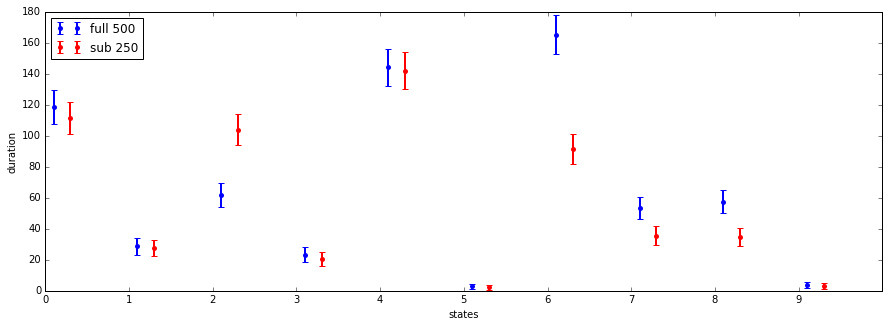

In [23]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
positions = list(range(len(params_sub)))
positions_0 = [p+0.1 for p in positions]
positions_1 = [p+0.3 for p in positions]
ax.errorbar(x=positions_0, y=params[('orig', 'lmbda')],
             yerr=np.sqrt(params[('orig', 'lmbda')]),
             fmt='o', ecolor='b', color='b', elinewidth=2,  ms=5,capthick=1, mew=0, label='full 500')
ax.errorbar(x=positions_1, y=params[('sub', 'lmbda')],
             yerr=np.sqrt(params[('sub', 'lmbda')]),
             fmt='o', ecolor='r', color='r', ms=5,capthick=1, mew=0, elinewidth=2, label='sub 250')
ax.set_xticks(positions)
ax.legend(loc=2)
ax.set_xlabel('states')
ax.set_ylabel('duration')
plt.show()

## KL divergence

In [24]:
def kl((mu_p, sigma_p), (mu_q, sigma_q)):
    term1 = np.log(sigma_q/sigma_p)
    term2  = (np.square(sigma_p) + np.square(mu_p - mu_q))/ (2*np.square(sigma_q))
    term3 = -.5
    return (term1 + term2 + term3) / np.log(2)

In [25]:
def kl_poisson(lam_p, lam_q):
    return (lam_p*np.log(lam_p/lam_q) + lam_q - lam_p)/np.log(2)

In [26]:
kl_orig_sub = kl((params[('orig', 'mean')],params[('orig', 'lmbda')]), 
                 (params[('sub', 'mean')],params[('sub', 'lmbda')]))
kl_orig_sub

0      0.006074
1      0.001969
2      0.284640
3      0.087943
4      0.009877
5      7.534241
6      0.775403
7      0.321711
8      0.988085
9    312.681128
dtype: float64

In [27]:
kl_poisson_orig_sub = kl_poisson(params[('orig', 'lmbda')], params[('sub', 'lmbda')])
kl_poisson_orig_sub

0     0.338231
1     0.022894
2    14.478636
3     0.234641
4     0.026215
5     0.113623
6    34.434932
7     5.473423
8     9.150721
9     0.138148
dtype: float64

In [28]:
params[('kl', 'acceleration')] = kl_orig_sub
params[('kl', 'duration')] = kl_poisson_orig_sub

In [29]:
params.columns

MultiIndex(levels=[[u'orig', u'sub', u'diff', u'kl'], [u'state', u'mean', u'sigma', u'lmbda', u'log_mean', u'log_sigma', u'acceleration', u'duration']],
           labels=[[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3], [3, 4, 5, 1, 2, 0, 3, 4, 5, 1, 2, 0, 1, 2, 4, 5, 3, 6, 7]])

In [30]:
params.loc[:, [('orig', 'state'), ('sub','state'), ('kl', 'acceleration'), ('kl', 'duration')]]

orig   sub           kl           
  state state acceleration   duration
0     5     1     0.006074   0.338231
1     6     2     0.001969   0.022894
2     8     0     0.284640  14.478636
3     9     9     0.087943   0.234641
4     0     3     0.009877   0.026215
5     7     7     7.534241   0.113623
6     4     8     0.775403  34.434932
7     3     4     0.321711   5.473423
8     2     5     0.988085   9.150721
9     1     6   312.681128   0.138148

In [31]:
def hellinger_distance((mu_p, sigma_p), (mu_q, sigma_q)):
    term1 = np.sqrt((2*sigma_p*sigma_q)/(np.square(sigma_p)+np.square(sigma_q)))
    term2 = np.exp(-.25*np.square(mu_p-mu_q)/(np.square(sigma_p)+np.square(sigma_q)))
    return 1 - term1*term2

In [32]:
hellinger_orig_sub = hellinger_distance((params[('orig', 'mean')],params[('orig', 'lmbda')]), 
                 (params[('sub', 'mean')],params[('sub', 'lmbda')]))
hellinger_orig_sub

0    0.001007
1    0.000333
2    0.062902
3    0.013475
4    0.001683
5    0.628889
6    0.079127
7    0.039745
8    0.098108
9    1.000000
dtype: float64

# Reproduce states on these 250

In [82]:
# Import data with states
filenames = os.listdir(config.states_path)
filenames = [fn for fn in filenames if os.path.isfile(os.path.join(config.states_path,fn))]

In [83]:
data_list = []
# Should be: acc, state1, state2

In [84]:
for fn in filenames:
    dataset = pd.read_csv(os.path.join(config.states_path,fn), 
                          encoding='utf-8', index_col='timestamp', 
                          parse_dates=True)
    X = dataset[config.hsmmconfig.column_names].as_matrix()
    prediction = model_orig.predict(X, 0)
    dataset['state_orig'] = prediction[1]
    data_list.append(dataset[['acceleration', 'state', 'state_orig']])

KeyboardInterrupt: 